In [343]:
import os

import cv2
import numpy as np
import imutils

import pylab as plt
%matplotlib inline

In [344]:
def exibir_imagens(list_process=None):
    if isinstance(list_process, list):
        for obj in list_process:
            plt.figure()
            plt.title(s=obj.get('title', ''))
            plt.xticks(obj.get('xticks', []))
            plt.yticks(obj.get('yticks', []))
            plt.imshow(X=obj.get('X'), cmap=obj.get('cmap', None))
            plt.tight_layout()
    else:
        obj = list_process
        plt.figure()
        plt.title(s=obj.get('title', ''))
        plt.xticks(obj.get('xticks', []))
        plt.yticks(obj.get('yticks', []))
        plt.imshow(X=obj.get('X'), cmap=obj.get('cmap', None))
        plt.tight_layout()
        

In [345]:
path = os.getcwd() + os.sep
png = path + '../../db_images/png/captcha.png'
jpeg = path + '../../db_images/jpeg/captcha.jpeg'
obama = path + '../../db_aulas/Imagens/obama.jpeg'
obama_knn = path + '../../db_aulas/Imagens/1200px-President_Barack_Obama.jpg'
path_images = [obama, obama_knn]

In [346]:
images = []
for path_img in path_images: 
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    it = {'title': 'Original',
          'X': img}
    images.append(it)

grays = []
for obj in images:
    gray = cv2.cvtColor(obj['X'], cv2.COLOR_BGR2GRAY)
    it = {'cmap': 'gray',
          'title': 'Original Gray',
          'X': gray}
    grays.append(it)

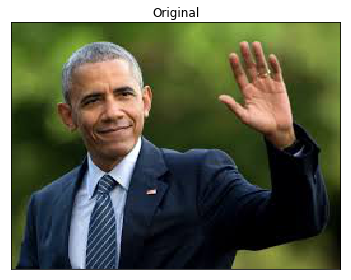

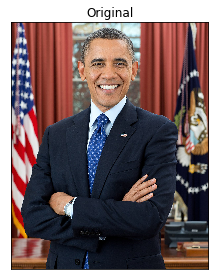

In [347]:
exibir_imagens(images)

In [376]:
kp_imgs = []
for obj in images:
    it = {}
    it.update(obj.copy())
    img = it.get('X')
    
    kwargs = {'image': img,
              'width': None,
              'height': None,
              'inter': 3
             }

#     img = imutils.resize(**kwargs)
    
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img.copy(), None)
    
    kp = sorted(keypoints, key=lambda x: x.response)[-10::]
    
    img_with_keypoists = cv2.drawKeypoints(img, kp, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        
    it.update({'X': img_with_keypoists, 'kp': kp, 'des': descriptors, 'origin': it.get('X').copy()})
    kp_imgs.append(it)

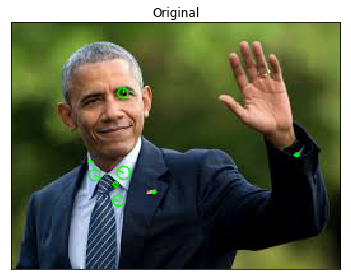

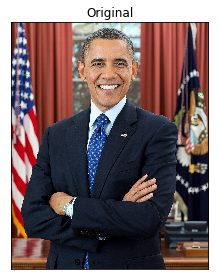

In [377]:
exibir_imagens(kp_imgs)

In [378]:
objs = [kp_imgs[0].copy(), kp_imgs[0].copy()] 

bf = cv2.BFMatcher()
matches = bf.knnMatch(objs[0].get('des'), objs[1].get('des'), k=2)

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
#         print(m.distance)

img3 = cv2.drawMatchesKnn(objs[0].get('origin'), objs[0].get('kp'), objs[1].get('origin'), objs[1].get('kp'), good, None, flags=2)

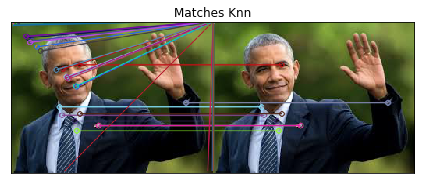

In [379]:
exibir_imagens({'X': img3, 'title': 'Matches Knn'})